In [1]:
import numpy as np
import xarray as xr
import pyproj
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmocean as cmo
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import cartopy
import cartopy.crs as ccrs
#import string

import sys
sys.path.append('../')

from plotfunctions import add_lonlat

np.seterr(all='ignore')
%matplotlib inline
%config InlineBackend.print_figure_kwargs={'bbox_inches':None}
%load_ext autoreload
%autoreload 2

In [2]:
startyear = 2003
endyear   = 2008

In [34]:
cmap1 = mpl.colors.ListedColormap(plt.get_cmap('cmo.deep_r')(np.linspace(0,.4,255)))
cmap2 = 'cmo.rain'
cmap3 = mpl.colors.ListedColormap(plt.get_cmap('cmo.gray')(np.linspace(.2,.6,255)))

xx,y0,y1 = 3520,7900,8100

In [35]:
vmax = 100
vmin = -10
linthresh=1
linscale=.2

vmax = 100
vmin = -10
linthresh = .3
linscale = .25


fracpos = (np.log10(vmax/linthresh)+linscale)/(np.log10(vmax/linthresh)+np.log10(-(vmin/linthresh))+2*linscale)
#print(fracpos)
nneg = np.int_((1-fracpos)*256)

colors1 = plt.get_cmap('cmo.ice_r')(np.linspace(0,.9,nneg))
colors2 = plt.cm.inferno(np.linspace(0.1, 1, 256-nneg))

# combine them and build a new colormap
colors = np.vstack((colors1, colors2))
mymap = mpl.colors.LinearSegmentedColormap.from_list('my_colormap', colors)

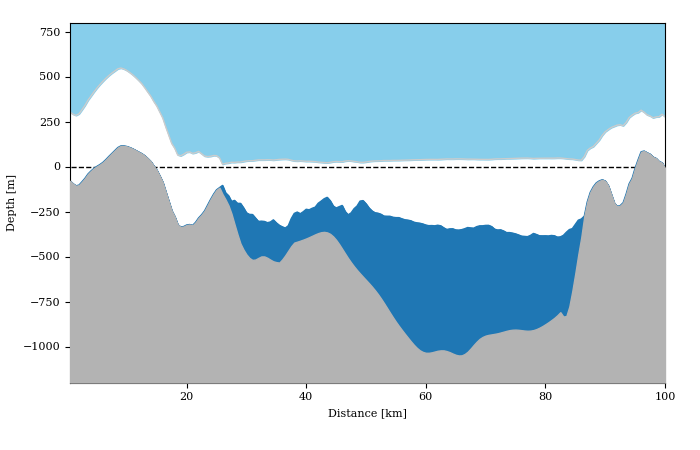

In [63]:
plt.style.use('style_paper')

#mpl.rc('figure.subplot',left=.01,right=.98,top=.95,bottom=.15,wspace=.05,hspace=.2)
mpl.rc('text',usetex=False)
fig = plt.figure(figsize=(7,4.5))

#Geometry
ds = xr.open_dataset('../../data/BedMachineAntarctica_2020-07-15_v02.nc')
ds = ds.isel(x=slice(xx,xx+1),y=slice(y0,y1))
ds = add_lonlat(ds)

xarr = .5*(len(ds.y)-np.arange(0,len(ds.y)))

ax = fig.add_subplot(111)
ax.plot(xarr,ds.surface,c='.8')
ax.plot(xarr,0*ds.y,'--',c='k',lw=1)
ax.plot(xarr,ds.surface-ds.thickness)
ax.fill_between(xarr,-1200+0*ds.y,ds.bed[:,0],color='.7',zorder=10)
ax.fill_between(xarr,ds.bed[:,0],(ds.surface-ds.thickness)[:,0],color='tab:blue')
ax.fill_between(xarr,ds.surface[:,0],800+0*ds.y,color='skyblue')

ax.set_xlim([xarr[-1],xarr[0]])
ax.set_ylim([-1200,800])
ax.set_xlabel('Distance [km]')
ax.set_ylabel('Depth [m]')

plt.show()
